In [2]:
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import math

np.warnings.filterwarnings('ignore')


def loadImage(path):
    '''
    Reads an image and return an array containing pixel intensity values
    Input : type - String
                value - Path to the image

    Returns : type - 2D numpy array
                value - Pixel Intensity Values at each pixelmpy array of image
    '''
    
    print("-----Loading Image-----")
    
    # Open a grayscale image
    image = PIL.Image.open(path).convert('L') 
    
    #make numpy array of the image
    image = np.array(image) 
    
    #print shapes of the image arrays
    print("image shape[0]",image.shape[0])
    print("image shape[0]",image.shape[1])
    return image

def gaussianSmoothing(image):
    '''
    Reads an array of of pixel intensity values and applies 7x7 gaussian smoothening

    Input: type - numpy array
                    value - Pixel Intensity values

    Returns: type - numpy array
                    values - Pixel Intensity values after gaussian smoothening
    '''
    print("-----Gaussian Smoothing-----")
    
    #declare the convolution mask
    convolutionMask =  np.array([[1,1,2,2,2,1,1],[1,2,2,4,2,2,1],[2,2,4,8,4,2,2],[2,4,8,16,8,4,2],[2,2,4,8,4,2,2],[1,2,2,4,2,2,1],[1,1,2,2,2,1,1]])
    
    #declare the output array
    output = np.zeros((image.shape[0]-6, image.shape[1]-6))
    print("output shape[0]",image.shape[0]-6)
    print("output shape[1]",image.shape[1]-6)
    
    #apply convolution mask after looping through every pixel
    for x in range(image.shape[0]-6):
        for y in range(image.shape[1]-6):
            # Applying the convolution filter
            output[x,y]=round(float(((convolutionMask*image[x:x+7,y:y+7]).sum())/140),2)
    
    # Assig the calculated pixel values to outputImage
    outputImage = np.zeros((image.shape[0], image.shape[1]))
    outputImage[3:-3, 3:-3] = output
    print("Image after Gaussian Smoothing")
    plt.imshow(outputImage, cmap='gray')
    plt.show()
    
    return outputImage

def gradientOperator(image):
    '''
    Reads an array of of pixel intensity values and applies prewitt's gradient operator

    Input: tyoe - numpy array
                    value - Pixel Intensity values

    Returns: type - 4 numpy arrays
                    values - return 1 : Gradient about X-axis
                                return 2 :  Gradient about Y-axis
                                    return 3 :  Gradient Magnitude
                                        return 4 :  Gradient Angle
    '''
    print("-----Gradient Operator-----")

    #print shapes of the image arrays
    print("image shape[0]",image.shape[0])
    print("image shape[0]",image.shape[1])
    
    #declare Sobel's operator
    gradX = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    gradY = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    
    #declare output arrays
    outputX = np.zeros((image.shape[0] - 8, image.shape[1] - 8))
    outputY = np.zeros((image.shape[0] - 8, image.shape[1] - 8))
    outputImageX = np.zeros((image.shape[0], image.shape[1]))
    outputImageY = np.zeros((image.shape[0], image.shape[1]))

    #apply the operator
    for x in range(3, image.shape[0]-6):
        for y in range(3, image.shape[1]-6):
            outputX[x-3,y-3]=((gradX*image[x:x+3,y:y+3]).sum())
            outputY[x-3,y-3]=((gradY*image[x:x+3,y:y+3]).sum())

    #normalizing image values
    outputX = outputX/4
    outputY = outputY/4

    #assign calculted pixels to outImage
    outputImageX[4:-4,4:-4] = outputX
    outputImageY[4:-4,4:-4] = outputY

    #calculate gradient magnitude 
    gradientMagnitude = np.around(np.sqrt((outputImageX * outputImageX) + (outputImageY * outputImageY)))

    #calculate gradient angle in radians
    gradientAngle = np.arctan(np.true_divide(outputImageX, outputImageY))
    
    #convert gradient angle in radians to degrees
    gradientAngle = gradientAngle * (180 / np.pi)
    
    #plot normalized horizontal gradient response
    print("Normalized horizontal gradient response")
    plt.imshow(outputImageX, cmap='gray')
    plt.show()
    
    #plot normalized vertical gradient response
    print("Normalized vertical gradient response")
    plt.imshow(outputImageY, cmap='gray')
    plt.show()
    
    return outputImageX, outputImageY, gradientMagnitude, gradientAngle

def nonMaximaSuppression(gradientMagnitude, gradientAngle):
    '''
    Reads two arrays of gradient magnitude and gradient angle and performs non maxima suppression

    Input: type - two numpy arrays
                    value - gradient magnitude and gradient angle at every pixel

    Returns: type - numpy array
                values - non maxima suppressed image array
    '''
    print("-----Non Maxima Suppression-----")
    
    
    output = np.zeros((gradientMagnitude.shape[0], gradientMagnitude.shape[1]))
    
    # Loop over every pixel of the image
    for x in range(1, gradientMagnitude.shape[0]-1):     
        for y in range(1, gradientMagnitude.shape[1]-1):
            currAngle = gradientAngle[x,y] 
            currMagnitude = gradientMagnitude[x,y]
            
            # No need of else statement (in nested if conditions) as entire matrix is initially set to zero

            if -22.5 <= currAngle <= 22.5 or currAngle <= -157.5 or currAngle >= 157.5: # Case 0
                if currMagnitude >= np.amax([currMagnitude, gradientMagnitude[x+1,y], gradientMagnitude[x-1,y]]):
                    output[x,y] = currMagnitude

            elif 22.5 <= currAngle <= 67.5 or -112.5 >= currAngle >= -157.5: # Case 1
                if currMagnitude >= np.amax([currMagnitude, gradientMagnitude[x+1,y-1], gradientMagnitude[x-1,y+1]]):
                    output[x,y] = currMagnitude

            elif 67.5 <= currAngle <= 112.5 or -67.5 >= currAngle >= -112.5: # Case 2
                if currMagnitude >= np.amax([currMagnitude, gradientMagnitude[x,y-1], gradientMagnitude[x,y+1]]):
                    output[x,y] = currMagnitude

            elif 112.5 <= currAngle <= 157.5 or -22.5 >= currAngle >= -67.5: # Case 3
                if currMagnitude >= np.amax([currMagnitude, gradientMagnitude[x-1,y-1], gradientMagnitude[x+1,y+1]]):
                    output[x,y] = currMagnitude
    
    #plot non maxima suppressed image
    print("Image after Non Maxima Suppression")
    plt.imshow(output,cmap='gray')
    plt.show()
    
    return output

def thresholding(T1,image,gradientMagnitude,gradientAngle):
    '''
    Reads three arrays of image,gradient magnitude and gradient angle and performs double thresholding 
    based on threshold T1

    Input: type - three numpy arrays, one integer
                    value - Pixel Intensity values, gradient magnitude and gradient angle at every pixel, threshold value

    Returns: type - numpy array
                values - final image after double thresholding
    '''
    
    #calculate T2
    T2=2*T1
    
    #loop through every pixel
    for x in range(0, image.shape[0]):
        for y in range(0, image.shape[1]):
            #if N[i,j]<T1, then E[i,j]=0
            if (image[x,y] < T1):
                image[x,y] = 0
            #if N[i,j]>T1, then E[i,j]=255
            elif (image[x,y] > T2):
                image[x,y] = 255
            #if pixel N(I,j) has an 8-connected neighbor N(𝑖′,𝑗′) with gradient magnitude N(𝑖′,𝑗′) > T2 
            ## AND the gradient angles of N(𝑖,𝑗) and N(𝑖′,𝑗′) differ by 45° or less, then E[i,j]=255, otherwise, then E[i,j]=0
            elif (T1 <= image[x,y] <= T2) :
                for i in range(-1,1):
                    for j in range(-1,1):
                        if((gradientMagnitude[x+i,y+j]>T2) and (abs(gradientMagnitude[x+i,+j]-gradientMagnitude[x,y])<=45)):
                            image[x,y] = 255
                        else:
                            image[x,y] = 0
    
    return image


-----Loading Image-----
image shape[0] 225
image shape[0] 225
-----Gaussian Smoothing-----
output shape[0] 219
output shape[1] 219
Image after Gaussian Smoothing


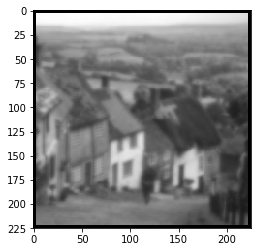

-----Gradient Operator-----
image shape[0] 225
image shape[0] 225
Normalized horizontal gradient response


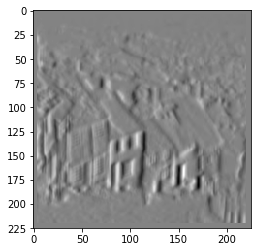

Normalized vertical gradient response


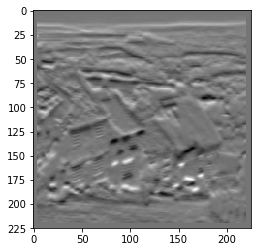

-----Non Maxima Suppression-----
Image after Non Maxima Suppression


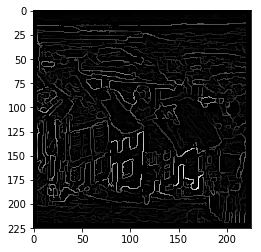

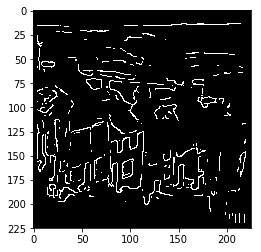

In [7]:
def runProject(path,T1):
    '''
    Reads path and thresholding value to perform Canny Edge Detection

    Input: type - string, integer
                    value - path where image is stored, threshold value

    Returns: type - plot
                values - final image
    '''
    
    #Loading image
    image=loadImage(path) 

    #Gaussian Smoothing
    gaussianImage = gaussianSmoothing(image)
    saveImage = PIL.Image.fromarray(gaussianImage).convert("RGB")
    saveImage.save(path[:-4] + "_GaussianSmoothing" + ".bmp")

    #Apply Gradient Operator
    gradientX, gradientY,gradientMagnitude,gradientAngle = gradientOperator(gaussianImage)
        ##saving normalized vertical gradient response
    saveImage = PIL.Image.fromarray(gradientX).convert("RGB")
    saveImage.save(path[:-4] + "_GradientX" + ".bmp")
        ##saving normalized vertical gradient response
    saveImage = PIL.Image.fromarray(gradientY).convert("RGB")
    saveImage.save(path[:-4] + "_GradientY" + ".bmp")
        ##saving normalized gradient magnitude image
    saveImage = PIL.Image.fromarray(gradientMagnitude).convert("RGB")
    saveImage.save(path[:-4] + "_GradientMagnitude" + ".bmp")

    #Non-Maxima Suppression
    nonMaximaImage=nonMaximaSuppression(gradientMagnitude, gradientAngle)
    saveImage = PIL.Image.fromarray(nonMaximaImage).convert("RGB")
    saveImage.save(path[:-4] + "_nonMaximaSuppressed" + ".bmp")

    #Double thresholding
    thresholdedImage=thresholding(T1,nonMaximaImage,gradientMagnitude,gradientAngle)
    saveImage = PIL.Image.fromarray(thresholdedImage).convert("RGB")
    saveImage.save(path[:-4] + "_DoubleThreshold" + ".bmp")

    #Plot final output image
    plt.imshow(thresholdedImage, cmap='gray')
    plt.show()
    
runProject("/Users/shwetasrivastava/Documents/CV/Houses-225.bmp",9)


-----Loading Image-----
image shape[0] 443
image shape[0] 665
-----Gaussian Smoothing-----
output shape[0] 437
output shape[1] 659
Image after Gaussian Smoothing


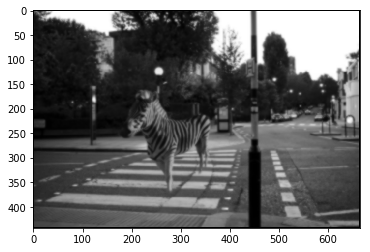

-----Gradient Operator-----
image shape[0] 443
image shape[0] 665
Normalized horizontal gradient response


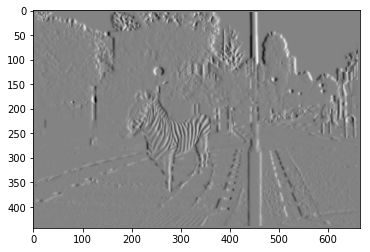

Normalized vertical gradient response


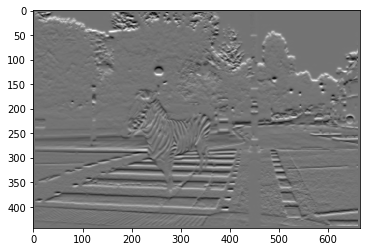

-----Non Maxima Suppression-----
Image after Non Maxima Suppression


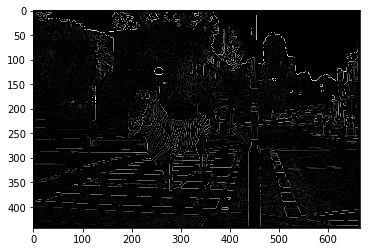

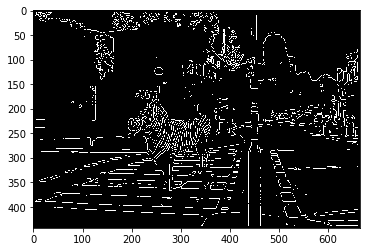

In [8]:
runProject("/Users/shwetasrivastava/Documents/CV/Zebra-crossing-1.bmp",9)